sensor_reports.dat contains a log of various sensors that make reports at different intervals.

You want to schedule three hours to monitor sensor data as it is coming in from multiple sources. You don't know the interval at which each sensor reports it, so you will have to reconstruct that from the logs. You do know that each sensor is configured to report on intervals of a certain number of hours, so you can ignore some variation in the minutes and seconds.

Supposing that it is March 5, 2020 5:28 AM, what is the best three-hour block of time (beginning on an hour) in the next week where the highest number of distinct sensors should be reporting in. If there are multiple blocks with the same number, give the earliest one.

You are considering all 3-hour periods from the one starting at March 5, 2020 6:00 AM to the one starting at March 12, 2020 5:28 AM, inclusive.

Provide your answer in the form "YYYY-MM-DD HH" (4 digits for the year, two digits for everything else - on a 24-hour clock).

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import timedelta as td

# pd.set_option('display.max_rows', 3000)
# pd.set_option('display.max_columns', 100)

In [3]:
sensor_data = pd.read_csv('sensor_reports.dat', sep=' ', header=0, names=['sensor',
                                                                          'date',
                                                                          'time',
                                                                          'dropme',
                                                                          'bytes',
                                                                          'dropme2'])
sensor_data.drop(['dropme', 'dropme2', 'bytes'], axis=1, inplace=True)
sensor_data['date_time'] = sensor_data['date'] + ' ' + sensor_data['time']
sensor_data['date_time'] = pd.to_datetime(sensor_data['date_time'])
sensor_data.drop(['date', 'time'], axis=1, inplace=True)
sensor_data.set_index('date_time', inplace=True, drop=True)
sensor_data

,sensor
date_time,
2020-01-05 05:34:58,qtRylSho
2020-01-05 05:53:41,l3xDxjaF
2020-01-05 06:07:26,mZ7gE7BA
2020-01-05 06:14:30,ZCwN5yKW
2020-01-05 06:16:37,l8rRDmto
...,...
2020-03-05 04:43:20,xP9m7KWc
2020-03-05 04:52:10,mhvIUy5D
2020-03-05 05:07:13,ZAhFbP5V


In [4]:
def find_intervals(sensor_data):
    average_intervals = {}
    for sensor in set(sensor_data['sensor']):
        temp = sensor_data[sensor_data['sensor'] == sensor]
        temp.sort_index(inplace=True)
        deltas = []
        for i in range(len(temp)-1):
            deltas.append((temp.index[i+1] - temp.index[i]))
        average_intervals.update({sensor : (sum(deltas, td(0)) / len(deltas)).round('60min')})
    
    return average_intervals

intervals = find_intervals(sensor_data)
intervals

{'oX4MwyiY': Timedelta('4 days 07:00:00'),
 'GPxpcQav': Timedelta('2 days 19:00:00'),
 'vM2bSBpQ': Timedelta('6 days 21:00:00'),
 'Lp5NzNDQ': Timedelta('6 days 08:00:00'),
 'siPetwDC': Timedelta('4 days 19:00:00'),
 'sa5N3XwA': Timedelta('0 days 21:00:00'),
 'LftTre9v': Timedelta('3 days 02:00:00'),
 'BobngYLK': Timedelta('1 days 09:00:00'),
 'p2zp9hJo': Timedelta('4 days 16:00:00'),
 'dwibl2Yf': Timedelta('0 days 23:00:00'),
 'FyiLxeMb': Timedelta('2 days 01:00:00'),
 'NHbathAP': Timedelta('6 days 09:00:00'),
 'C6GJQZit': Timedelta('3 days 05:00:00'),
 'NquVfxsk': Timedelta('6 days 19:00:00'),
 '1GYuDO8V': Timedelta('2 days 23:00:00'),
 'glOteis5': Timedelta('0 days 23:00:00'),
 'AFiSYwDE': Timedelta('5 days 00:00:00'),
 'YssoGOz6': Timedelta('5 days 03:00:00'),
 'lKkU847V': Timedelta('3 days 13:00:00'),
 'MUAAooR4': Timedelta('3 days 09:00:00'),
 '2YxsN1er': Timedelta('0 days 16:00:00'),
 'qtRylSho': Timedelta('0 days 03:00:00'),
 'ViWt9PV8': Timedelta('0 days 21:00:00'),
 '3gkx5X3f'

In [5]:
def project_future(sensor_data, intervals):
    
    projected_dates = []
    sensors = []
    
    for sensor, interval in intervals.items():
        temp = sensor_data[sensor_data['sensor'] == sensor]
        last_collect = temp.index[-1]
        while last_collect <= pd.Timestamp(2020, 3, 12, 8, 28):
            projected_dates.append(last_collect + interval)
            sensors.append(sensor)
            last_collect = projected_dates[-1]
            
    projected = pd.DataFrame()
    projected['date_time'] = projected_dates 
    projected['sensor'] = sensors
    projected.set_index('date_time', inplace=True, drop=True)
    projected.sort_index(inplace=True)
    projected = projected[projected.index <= pd.Timestamp(2020, 3, 12, 8, 28)]
    
    return projected


projected = project_future(sensor_data, intervals)
projected

,sensor
date_time,
2020-03-05 05:32:50,qtRylSho
2020-03-05 05:37:39,bi6MIrMH
2020-03-05 05:42:54,tcEiyhn7
2020-03-05 06:14:27,swUrwvop
2020-03-05 06:39:13,aOhAxpOG
...,...
2020-03-12 07:43:20,xP9m7KWc
2020-03-12 07:44:21,2QW86LHo
2020-03-12 07:48:59,l3xDxjaF


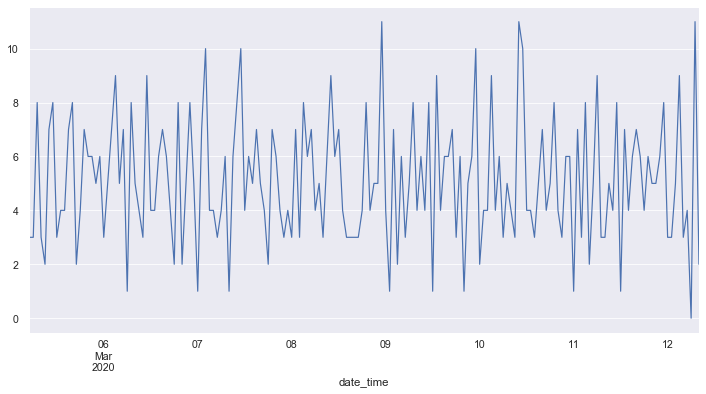

In [6]:
projected.groupby(pd.Grouper(freq='H'))['sensor'].nunique().plot(figsize=(12,6));

In [7]:
# Answer: 2020-03-10 10 
# There are 25 unique sensors reporting in.

blocks = projected.groupby(pd.Grouper(freq='H'))['sensor'].nunique()

possible_blocks = []
for i in range(len(blocks)-3):
    possible_blocks.append((blocks.index[i], sum(blocks[i:i+3])))
    
sorted(possible_blocks, key=lambda x: x[1], reverse=True)

[(Timestamp('2020-03-10 10:00:00', freq='H'), 25),
 (Timestamp('2020-03-07 09:00:00', freq='H'), 24),
 (Timestamp('2020-03-10 09:00:00', freq='H'), 24),
 (Timestamp('2020-03-07 10:00:00', freq='H'), 22),
 (Timestamp('2020-03-08 10:00:00', freq='H'), 22),
 (Timestamp('2020-03-06 01:00:00', freq='H'), 21),
 (Timestamp('2020-03-06 02:00:00', freq='H'), 21),
 (Timestamp('2020-03-06 03:00:00', freq='H'), 21),
 (Timestamp('2020-03-07 01:00:00', freq='H'), 21),
 (Timestamp('2020-03-08 03:00:00', freq='H'), 21),
 (Timestamp('2020-03-08 09:00:00', freq='H'), 21),
 (Timestamp('2020-03-08 21:00:00', freq='H'), 21),
 (Timestamp('2020-03-09 21:00:00', freq='H'), 21),
 (Timestamp('2020-03-07 11:00:00', freq='H'), 20),
 (Timestamp('2020-03-08 22:00:00', freq='H'), 20),
 (Timestamp('2020-03-05 14:00:00', freq='H'), 19),
 (Timestamp('2020-03-05 19:00:00', freq='H'), 19),
 (Timestamp('2020-03-06 14:00:00', freq='H'), 19),
 (Timestamp('2020-03-09 13:00:00', freq='H'), 19),
 (Timestamp('2020-03-09 15:00:0